# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#! pip install citipy

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [4]:
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [83]:
print("Beginning Data Retrieval ")
print("------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#for each city name in cities list using enumerate
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval 
------------------------------
Processing Record 47 of Set 2 : tessalit
City not found. Skipping...
Processing Record 48 of Set 2 : hilo
Processing Record 49 of Set 2 : wana
Processing Record 50 of Set 2 : mataura
Processing Record 0 of Set 3 : beringovskiy
Processing Record 1 of Set 3 : tilichiki
Processing Record 2 of Set 3 : fairbanks
Processing Record 3 of Set 3 : codrington
Processing Record 4 of Set 3 : welahan
Processing Record 5 of Set 3 : kodiak
Processing Record 6 of Set 3 : port macquarie
Processing Record 7 of Set 3 : sinnamary
Processing Record 8 of Set 3 : chokurdakh
Processing Record 9 of Set 3 : ushuaia
Processing Record 10 of Set 3 : khovu-aksy
Processing Record 11 of Set 3 : shache
Processing Record 12 of Set 3 : punta arenas
Processing Record 13 of Set 3 : mezen
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 3 : new norfolk
Processing Record 15 of Set 3 : kapaa
City not found. Skipping...
Processing Recor

Processing Record 27 of Set 6 : broken hill
Processing Record 28 of Set 6 : okha
Processing Record 29 of Set 6 : kismayo
Processing Record 30 of Set 6 : mitu
Processing Record 31 of Set 6 : anzhero-sudzhensk
Processing Record 32 of Set 6 : quartucciu
Processing Record 33 of Set 6 : waipawa
Processing Record 34 of Set 6 : almeirim
Processing Record 35 of Set 6 : sakaraha
Processing Record 36 of Set 6 : bako
Processing Record 37 of Set 6 : varhaug
Processing Record 38 of Set 6 : pundaguitan
Processing Record 39 of Set 6 : skibbereen
Processing Record 40 of Set 6 : klaksvik
Processing Record 41 of Set 6 : parana
Processing Record 42 of Set 6 : port pirie
Processing Record 43 of Set 6 : lagoa
Processing Record 44 of Set 6 : mwanza
Processing Record 45 of Set 6 : pimentel
Processing Record 46 of Set 6 : salinopolis
Processing Record 47 of Set 6 : arman
Processing Record 48 of Set 6 : nampula
Processing Record 49 of Set 6 : alta
Processing Record 50 of Set 6 : tevaitoa
Processing Record 0 of

City not found. Skipping...
Processing Record 17 of Set 10 : starozhilovo
Processing Record 18 of Set 10 : pervomayskiy
Processing Record 19 of Set 10 : francisco sa
Processing Record 20 of Set 10 : beeville
Processing Record 21 of Set 10 : okato
Processing Record 22 of Set 10 : praia da vitoria
Processing Record 23 of Set 10 : aliwal north
Processing Record 24 of Set 10 : manokwari
Processing Record 25 of Set 10 : krzeszowice
Processing Record 26 of Set 10 : solton
City not found. Skipping...
Processing Record 27 of Set 10 : daru
Processing Record 28 of Set 10 : asfi
Processing Record 29 of Set 10 : la primavera
Processing Record 30 of Set 10 : bayir
Processing Record 31 of Set 10 : singkang
Processing Record 32 of Set 10 : akhalgori
Processing Record 33 of Set 10 : severo-yeniseyskiy
Processing Record 34 of Set 10 : oyama
Processing Record 35 of Set 10 : cacoal
Processing Record 36 of Set 10 : itaunja
Processing Record 37 of Set 10 : inhambane
Processing Record 38 of Set 10 : altamir

City not found. Skipping...
Processing Record 48 of Set 13 : pangkalanbuun
Processing Record 49 of Set 13 : winnemucca
Processing Record 50 of Set 13 : puerto del rosario
Processing Record 0 of Set 14 : tucumcari
Processing Record 1 of Set 14 : ixtapa
Processing Record 2 of Set 14 : vostok
Processing Record 3 of Set 14 : bairiki
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
#creating a dataframe 
weather_df = pd.DataFrame({"City": city_list,
                           "Lat": lat_list,
                           "Lng": lng_list,
                           "Max Temp": max_temp_list,
                           "Humidity": humidity_list,
                           "Clouds": cloud_list,
                           "Wind Speed": wind_speed_list,
                           "Country": country_list,
                           "Date": date_list})
#counting the data
weather_df.count()

City          666
Lat           666
Lng           666
Max Temp      666
Humidity      666
Clouds        666
Wind Speed    666
Country       666
Date          666
dtype: int64

In [85]:
#displaying the Data Frame
weather_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Port Hedland,-20.3167,118.5667,84.25,79,100,14.97,AU,1643648998
1,Portland,45.5234,-122.6762,41.90,91,75,1.01,US,1643648973
2,Rikitea,-23.1203,-134.9692,76.93,63,100,3.22,PF,1643649118
3,Port Hedland,-20.3167,118.5667,84.25,79,100,14.97,AU,1643649384
4,Portland,45.5234,-122.6762,41.90,91,75,1.01,US,1643648973
5,Rikitea,-23.1203,-134.9692,76.93,63,100,3.22,PF,1643649118
6,Albany,42.6001,-73.9662,28.74,47,41,4.00,US,1643649182
7,Busselton,-33.6500,115.3333,62.04,68,43,15.75,AU,1643649384
8,Zalegoshch',52.9008,36.8869,26.69,95,99,12.21,RU,1643649385
9,George Town,5.4112,100.3354,84.15,81,20,5.75,MY,1643649294


In [88]:
#exporting the data to csv
weather_df.to_csv("../output_data/cities.csv", index = False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#checking if there is any city with a humidty higher than 100%
greater_humidity = weather_df.query("Humidity > 100")
print(greater_humidity)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Clouds, Wind Speed, Country, Date]
Index: []


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

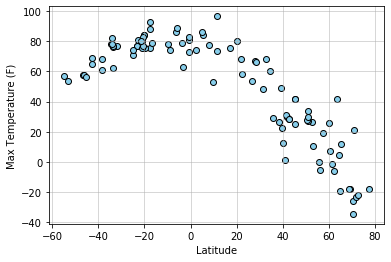

In [39]:
#scatter plot Latitute vs Temperature 
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color = "skyblue", edgecolor = "black")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#setting grid line
plt.grid(linestyle = "-", linewidth = 1, alpha = 0.5)

#titling 
plt.title = ("City Latitude vs. Max Temperature Plot")

#saving the image
plt.savefig("../python_api_challenge/Latitude vs Max Temperature.png")



## Latitude vs. Humidity Plot

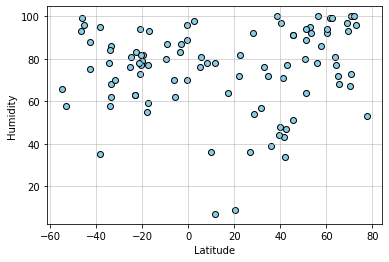

In [41]:
#scatter plot Latitute vs Humidity  
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color = "skyblue", edgecolor = "black")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#setting grid line
plt.grid(linestyle = "-", linewidth = 1, alpha = 0.5)

#titling 
plt.title = ("City Latitude vs. Humidity")

#saving the image
plt.savefig("../python_api_challenge/Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

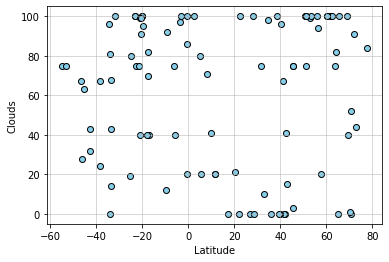

In [43]:
#scatter plot Latitute vs Cloudiness  
plt.scatter(weather_df["Lat"], weather_df["Clouds"], color = "skyblue", edgecolor = "black")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Clouds")

#setting grid line
plt.grid(linestyle = "-", linewidth = 1, alpha = 0.5)

#titling 
plt.title = ("City Latitude vs. Cloudiness")

#saving the image
plt.savefig("../python_api_challenge/Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

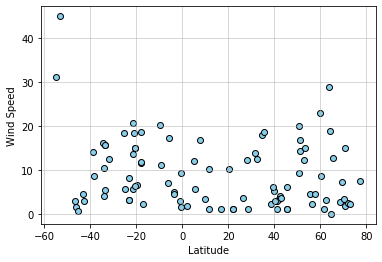

In [44]:
#scatter plot Latitute vs Wind Speed  
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color = "skyblue", edgecolor = "black")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#setting grid line
plt.grid(linestyle = "-", linewidth = 1, alpha = 0.5)

#titling 
plt.title = ("City Latitude vs. Wind Speed")

#saving the image
plt.savefig("../python_api_challenge/Latitude vs Wind Speed.png")

## Linear Regression

In [45]:
#creating Northern and Southern Hemisphere DFs
north_hemis = weather_df.loc[weather_df["Lat"] >= 0]
south_hemis = weather_df.loc[weather_df["Lat"] < 0]

#defining the function to create linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values, "r-")
    return line_eq

#defining the function to annotate
def annotate(line_eq, a,b):
    plt.annotate(line_eq,(a,b), fontsize=10, color="red")
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.9
Very strong negative correlation


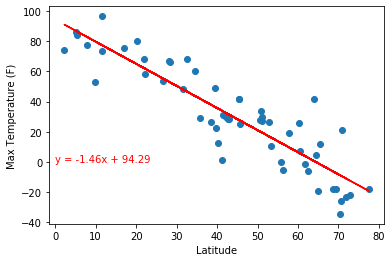

In [68]:
#generating a plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(north_hemis["Lat"], north_hemis["Max Temp"])
annotate(equation, 0 ,0)

#titling
plt.title = ("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#saving the image
plt.savefig("../python_api_challenge/Northern Hemisphere - Max Temperature vs. Latitude Linear Regression.png")

#commenting 
print("Very strong negative correlation")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.66
Strong positive correlation


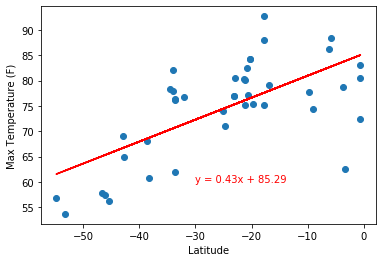

In [67]:
#generating a plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(south_hemis["Lat"], south_hemis["Max Temp"])
annotate(equation, -30 , 60)

#titling
plt.title = ("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#saving the image
plt.savefig("../python_api_challenge/Southern Hemisphere - Max Temperature vs. Latitude Linear Regression.png")

#commenting 
print("Strong positive correlation")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.38
Weak positive correlation


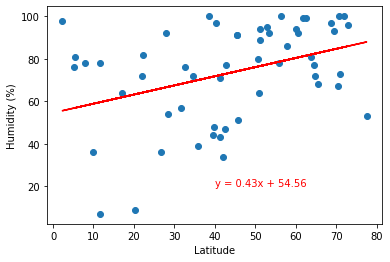

In [69]:
#generating a plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(north_hemis["Lat"], north_hemis["Humidity"])
annotate(equation, 40 , 20)

#titling
plt.title = ("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#saving the image
plt.savefig("../python_api_challenge/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

#commenting 
print("Weak positive correlation")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09
Very weak positive correlation


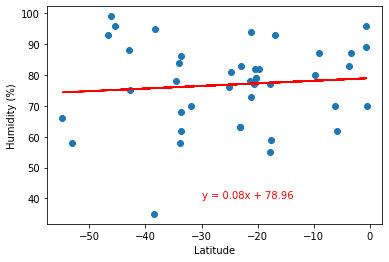

In [70]:
#generating a plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(south_hemis["Lat"], south_hemis["Humidity"])
annotate(equation, -30 , 40)

#titling
plt.title = ("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#saving the image
plt.savefig("../python_api_challenge/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

#commenting 
print("Very weak positive correlation")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.23
Weak positive correlation


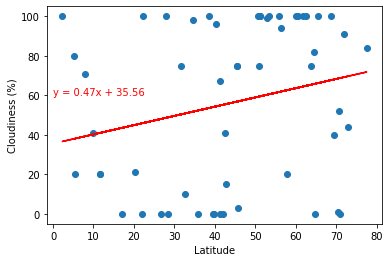

In [71]:
#generating a plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(north_hemis["Lat"], north_hemis["Clouds"])
annotate(equation, 0 , 60)

#titling
plt.title = ("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#saving the image
plt.savefig("../python_api_challenge/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

#commenting 
print("Weak positive correlation")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.22
Weak positive correlation


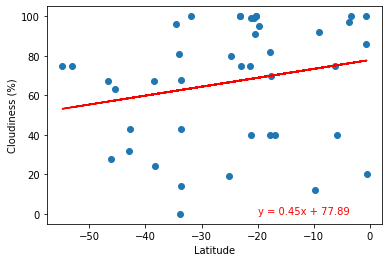

In [72]:
#generating a plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(south_hemis["Lat"], south_hemis["Clouds"])
annotate(equation, -20, 0)

#titling
plt.title = ("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#saving the image
plt.savefig("../python_api_challenge/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

#commenting 
print("Weak positive correlation")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09
Very weak positive correlation


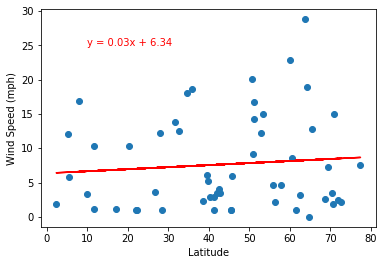

In [79]:
#generating a plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(north_hemis["Lat"], north_hemis["Wind Speed"])
annotate(equation, 10 , 25)

#titling
plt.title = ("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#saving the image
plt.savefig("../python_api_challenge/Northern Hemisphere - Wind Speed (mph vs. Latitude Linear Regression.png")

#commenting 
print("Very weak positive correlation")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.25
Weak negative correlation


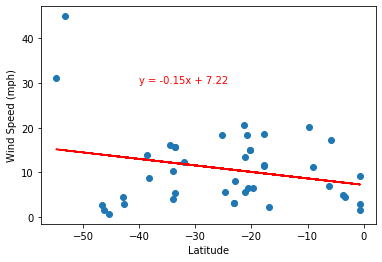

In [81]:
#generating a plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(south_hemis["Lat"], south_hemis["Wind Speed"])
annotate(equation, -40, 30)

#titling
plt.title = ("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#setting labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#saving the image
plt.savefig("../python_api_challenge/Southern Hemisphere - Wind Speed (mph vs. Latitude Linear Regression.png")

#commenting 
print("Weak negative correlation")